# Project: Wrangling and Analyze Data

# Data Gathering

In [1]:
#import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
import datetime as dt
import re

In [2]:
#importing twitter archive enchanced
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#use the request library to download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_prediction.tsv', mode = 'wb') as file:
    file.write(response.content)
    

image_pred_df = pd.read_csv('image_prediction.tsv', sep = '\t')

In [4]:
#use the tweepy library to query additional data via the twitter API (tweet_json.txt)
#couldn't download the file from twitter archive using their API,
#So I used the one provided by Udacity.

#Read in the file into a variable
df_lst = [] #an empty list that will contains all the element of the file
with open('tweet-json.txt') as file:
    for line in file.readlines():
        df_lst.append(json.loads(line)) #append all the element

#convert the list to dataframe
twitter_json_df = pd.DataFrame(df_lst)

# Assessing Data

In [5]:
#assessing twitter_archive
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [6]:
#assessing rating_denominator column
twitter_archive_df.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [7]:
#assessing rating numerator column
twitter_archive_df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [81]:
#assessing text column to verify dog stages
#dogs_stage = [] #store the extract in a list
#q = r"^(Doggo|Pupper|Floofer|Puppo)"
#p = r"(doggo| pupper|floofer|puppo)"
#for row in tweet_archive.text:
#    if re.findall(p, row):
  #      dogs_stage.append(p)
  #  elif re.findall(q, row):
    #    dogs_stage.append(q)
    #else:
        #dogs_stage.append('None')

In [8]:
#assessing twitter_json
twitter_json_df.to_csv('tweet_json.csv')

In [9]:
twitter_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [10]:
#assessing image_predication
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Quality Issues

# Twitter Archive

1. Timestamp is datetime not object.
2. Tweet_id is object not int
3. Some numerator ratings are in decimal and some have zero value
3. Some entries are retweets and not tweets itself
4. Some entries ain't dogs (index: 62, 47, 59, etc)
5. Inconsistency in name format for dogs (a, an, some, none, etc) while some do not have names at all.

# Twitter Json

1. Id has to be renamed so to match naming in other datasets
2. Id is object not int
3. Missing records

# Image Prediction

1. Tweet_id is object not int
2. Missing records

# Tidiness Issues

1. Doggo, floofer, pupper and puppo should be on the same column since they're referring to different stages of dogs.
2. The three datasets (twitter_archive, twitter_json and image_pred) should be merged since they're differing to same things

# Cleaning Data

In [5]:
##Make copies of original datasets
tweet_archive = twitter_archive_df.copy()
tweet_json = twitter_json_df.copy()
dog_imag_pred = image_pred_df.copy()

In [6]:
#Droping some uneccessary columns in the datasets
tweet_archive = tweet_archive[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator',
                               'name', 'doggo', 'floofer', 'pupper', 'puppo']]
tweet_json = tweet_json[['id', 'retweet_count', 'favorite_count']]
dog_imag_pred = dog_imag_pred[['tweet_id', 'img_num']]

# Issue #1:

Define: Convert timestamp from object to datetime

In [7]:
tweet_archive['timestamp'].head(2)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
Name: timestamp, dtype: object

Code

In [8]:
#convert timestamp from object to datetime

#tweet_archive['timestamp'] = tweet_archive['timestamp'].dt.strftime('%Y-%m-%d').apply(pd.to_datetime,format = '%Y-%m-%d')
#tweet_archive['timestamp'] = tweet_archive['timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#tweet_archive['timestamp'] = tweet_archive['timestamp'].apply(pd.to_datetime, 
 #                                                            format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')
    
tweet_archive['timestamp'] = tweet_archive["timestamp"].apply(lambda x:dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S +0000'))

In [9]:
tweet_archive.text.head(5)                                                       

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [10]:
#Extracting year and month from timestamp column
tweet_archive['year'] = tweet_archive.timestamp.dt.year
tweet_archive['month'] = tweet_archive.timestamp.dt.month_name()

#Drop timestamp from tweet_archive dataset
tweet_archive.drop('timestamp', axis = 1, inplace = True)

Test

In [11]:
tweet_archive[['year', 'month']].head(5)

,year,month
0,2017,August
1,2017,August
2,2017,July
3,2017,July
4,2017,July


# Issue #2

Define: Convert tweet_id datatype to string

Code

In [12]:
tweet_archive['tweet_id'] = tweet_archive.tweet_id.astype(str)

Test

In [13]:
tweet_archive.tweet_id.dtypes

dtype('O')

# Issue #3

Define: Some numerators rating are in decimal and would be recified manually.

In [14]:
pd.set_option('display.max_colwidth', None)
# filter only tweets with decimal numbers 
tweet_archive[tweet_archive.text.str.extract(r'(\d+\.\d+)', expand=False).notnull()].text

45                               This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
259                        This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL
340                          RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
695                                      This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
763     This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1018                                                                                                      Guys... Dog Jesus 2.0\n13/10 buoyant af http

In [21]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 45] #The rating of the number would be corrected manually

,tweet_id,rating_numerator,rating_denominator
45,883482846933004288,5,10


In [47]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 259] #This is correct rating

,tweet_id,rating_numerator,rating_denominator
259,843235543001513987,13,10


In [48]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 340] #This is a retweet and would be deleted in issue 4.

,tweet_id,rating_numerator,rating_denominator
340,832215909146226688,75,10


In [49]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 695] #This is a retweet and would be deleted in issue 4.

,tweet_id,rating_numerator,rating_denominator
695,786709082849828864,75,10


In [22]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 763] #The rating of the number would be corrected manually

,tweet_id,rating_numerator,rating_denominator
763,778027034220126208,27,10


In [23]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1018] #This is correct rating.

,tweet_id,rating_numerator,rating_denominator
1018,746818907684614144,13,10


In [24]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1294] #This is correct rating.

,tweet_id,rating_numerator,rating_denominator
1294,707995814724026368,12,10


In [25]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1689] #This is a comment and would be deleted

,tweet_id,rating_numerator,rating_denominator
1689,681340665377193984,5,10


In [26]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1712] #Don't really know and would be deleted

,tweet_id,rating_numerator,rating_denominator
1712,680494726643068929,26,10


In [27]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1768] #This is correct rating.

,tweet_id,rating_numerator,rating_denominator
1768,678389028614488064,11,10


In [28]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 1790] #This is correct rating.

,tweet_id,rating_numerator,rating_denominator
1790,677530072887205888,9,10


In [29]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 2347] #This is correct rating.

,tweet_id,rating_numerator,rating_denominator
2347,666057090499244032,9,10


Code

In [15]:
#replace 5, 75 and 27 with 13, 9 and 11 which I assume to be correct rating.
rating = {5 : 13, 75: 9, 27: 11, 26 : 11} 
tweet_archive.rating_numerator.replace(rating, inplace = True)

In [16]:
tweet_archive[['tweet_id','rating_numerator', 'rating_denominator']][tweet_archive.index == 763]

,tweet_id,rating_numerator,rating_denominator
763,778027034220126208,11,10


Test

In [17]:
tweet_archive.loc[tweet_archive.index.isin([45, 259, 695, 763, 1018, 1294, 1768, 1790, 2347])]

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13,10,Bella,None,None,None,None,2017,July
259,843235543001513987,This is Tycho. She just had new wheels installed. About to do a zoom. 0-60 in 2.4 seconds. 13/10 inspirational as h*ck https://t.co/DKwp2ByMsL,13,10,Tycho,None,None,None,None,2017,March
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9,10,Logan,None,None,None,None,2016,October
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11,10,Sophie,None,None,pupper,None,2016,September
1018,746818907684614144,Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,13,10,None,None,None,None,None,2016,June
1294,707995814724026368,This is Farfle. He lost his back legs during the Battle of Gettysburg. Goes 0-60 in 4.3 seconds (damn) 12/10 hero af https://t.co/NiQQWzIzzq,12,10,Farfle,None,None,None,None,2016,March
1768,678389028614488064,This is Bella. She just learned that her final grade in chem was a 92.49 \npoor pupper 11/10 https://t.co/auOoKuoveM,11,10,Bella,None,None,pupper,None,2015,December
1790,677530072887205888,Say hello to Axel. He's a Black Chevy Pinot on wheels. 0 to 60 in 5.7 seconds (if downhill). 9/10 I call shotgun https://t.co/DKe9DBnnHE,9,10,Axel,None,None,None,None,2015,December
2347,666057090499244032,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,9,10,a,None,None,None,None,2015,November


In [18]:
#drop rating_numerator and denominator == 0
tweet_archive = tweet_archive.query('rating_numerator != 0 & rating_denominator != 0')

In [19]:
tweet_archive.rating_numerator.unique()

array([  13,   12,   14,   17,   11,   10,  420,  666,    6,   15,  182,
          9,    7,   84,   24,    8,    1,    3,    4,  165, 1776,  204,
         50,   99,   80,   45,   60,   44,  143,  121,   20,    2,  144,
         88], dtype=int64)

In [29]:
#drop comment rows
#comment = [1896, 1689, 1116, 1726, 1712] 
#tweet_archive = tweet_archive.drop(comment, axis = 0, inplace = True)

# Issue: #4

Define: Some entries are retweets and not tweets itself

Code

In [20]:
#Visual assessment with Microsoft Excel shows that most retweets start with @, RT and .@
#Regex function to extract text columns that start with @, RT and .@
retweet = []
p = r'^(@|RT|.@)'
for row in tweet_archive.text:
    if re.findall(p, row):
        retweet.append(row)  

In [21]:
#convert the index of the extract to list
retweet_index = list(tweet_archive.loc[tweet_archive.text.isin(retweet)].index)

In [24]:
#tweet_archive.query('text.isin(retweet)')

In [22]:
len(retweet_index)

207

In [23]:
#visual assessment with Microsoft Excel shows that most retweets start with @
#Drop any row in text column that starts with @

#tweet_archive = tweet_archive.loc[tweet_archive.index not in retweet_index]

tweet_archive.drop(retweet_index, axis = 0, inplace = True)


In [28]:
#tweet_archive.to_csv('weratedog.csv') # saved for further visual assessment with excel
#tweet_archive.text.sample(20)

In [31]:
#tweet_archive[tweet_archive.index == 1896] #This mere comment and will be dropped

In [32]:
#tweet_archive[tweet_archive.index == 1689]

In [43]:
#tweet_archive[tweet_archive.index == 1689]

# Issue #5

Define: Some entries ain't dogs

code

In [24]:
#Regex function to extract text rows that have the features
#extracting rows tweet not about dogs, that is having any of the listed features above.
not_dogs = [] #store the extract in a list
q = r"^(We. Only. Rate. Dogs.|HI.)"
p = r"(without a dog|please only dogs| We only rate dogs| don't rate| without any dogs|Black bears| Monkey|without dogs| only rate dogs|Please stop sending|stop sending)"
for row in tweet_archive.text:
    if (re.findall(p, row)) or (re.findall(q, row)):
        not_dogs.append(row)

In [62]:
#not_dogs

In [25]:
#store the rows the that have the extracts in list
not_dogs_index = list(tweet_archive.loc[tweet_archive.text.isin(not_dogs)].index)

In [30]:
#not_dogs_index

In [31]:
#tweet_archive[tweet_archive.index == 213].text

In [26]:
tweet_archive.loc[tweet_archive.index.isin(not_dogs_index)] #locate the extract in the dataset, tweet_archive

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
25,887101392804085760,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,12,10,None,None,None,None,None,2017,July
47,883117836046086144,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E",13,10,None,None,None,None,None,2017,July
59,880872448815771648,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,12,10,None,None,None,None,None,2017,June
62,880095782870896641,Please don't send in photos without dogs in them. We're not @porch_rates. Insubordinate and churlish. Pretty good porch tho 11/10 https://t.co/HauE8M3Bu4,11,10,None,None,None,None,None,2017,June
89,875021211251597312,Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW,12,10,None,None,None,None,None,2017,June
...,...,...,...,...,...,...,...,...,...,...,...
1778,677895101218201600,Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb,9,10,None,None,None,None,None,2015,December
1854,675534494439489536,Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,11,10,a,None,None,None,None,2015,December
1869,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10,None,None,None,None,None,2015,December
1877,675109292475830276,C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,9,10,a,None,None,None,None,2015,December


In [27]:
tweet_archive.drop(not_dogs_index, axis = 0, inplace = True) #drop the rows from the dataset

In [28]:
tweet_archive.to_csv('weratedog.csv') #save as csv file for futher visual assessment in Microsoft Excel

# Issue #6:

Define: Inconsistency in name format for dogs (a, none, the, one, my etc)

code

In [40]:
tweet_archive[tweet_archive.name == 'life']

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
1916,674307341513269249,This is life-changing. 12/10 https://t.co/SroTpI6psB,12,10,life,None,None,None,None,2015,December


In [137]:
#tweet_archive.name.unique()

In [140]:
#name_index = tweet_archive[tweet_archive.name.isin(['officially', 'None', 'such',
#                                       'all', 'the', 'just', 'old', 'by', 'life'])].index

In [29]:
#Replace all name with the features in the list with None
name_lst = ['officially', 'None', 'such', 'all', 'the', 'just', 'old', 'by', 'life', 'a', 'one', 'my', 'mad']
for item in name_lst:
    tweet_archive.name.replace(item, 'None', inplace = True)


Test

In [30]:
#tweet_archive.name.unique()
tweet_archive[tweet_archive.name.isin(name_lst)].sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
2201,668645506898350081,Incredibly rare dog here. Good at bipedalism. Rad blue spikes. Ready to dance. 11/10 https://t.co/70X1TIXn38,11,10,None,None,None,None,None,2015,November
1584,687096057537363968,This pupper's New Year's resolution was to become a Hershey's kiss. 11/10 she's super pumped about it https://t.co/D7jYj6vdwC,11,10,None,None,None,pupper,None,2016,January
2288,667176164155375616,These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN,4,10,None,None,None,None,None,2015,November
647,793135492858580992,Your favorite squad is looking extra h*ckin spooky today. 13/10 for all https://t.co/PrgvOyPtDT,13,10,None,None,None,None,None,2016,October
1108,734559631394082816,When your friend is turnt af and you're just trying to chill. 10/10 (vid by @presgang) https://t.co/OufVDk23JC,10,10,None,None,None,None,None,2016,May
1784,677662372920729601,"In honor of the new Star Wars movie. Here's Yoda pug. 12/10 pet really well, would I https://t.co/pvjdRn00XH",12,10,None,None,None,None,None,2015,December
781,775729183532220416,This girl straight up rejected a guy because he doesn't like dogs. She is my hero and I give her 13/10 https://t.co/J39lT3b0rH,13,10,None,None,None,None,None,2016,September
2037,671561002136281088,This is the best thing I've ever seen so spread it like wildfire &amp; maybe we'll find the genius who created it. 13/10 https://t.co/q6RsuOVYwU,13,10,None,None,None,None,None,2015,December
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,10,10,None,None,None,pupper,None,2016,February
2211,668614819948453888,Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm,7,10,None,None,None,None,None,2015,November


In [62]:
#tweet_archive.drop('text', axis = 1, inplace = True) #drop text column
#tweet_archive.head()

In [123]:
#dogs_stage

In [37]:
#Extract dog stage both in uppercase and lowercase
#tweet_archive['dog_stage'] = tweet_archive['text'].str.extract("(doggo|pupper|floofer|puppo|Doggo|Pupper|Floofer|Puppo)")

In [38]:
#tweet_archive.dog_stage.value_counts()

In [40]:
#replace the uppercase with lowercase
#dog_stag = {'Doggo':'doggo', 'Pupper' : 'pupper', 'Floofer': 'floofer', 'Puppo':'puppo'}
#tweet_archive.dog_stage.replace(dog_stag, inplace = True)

In [41]:
#tweet_archive.dog_stage.value_counts()

In [32]:
#drop text column from the dataset
tweet_archive.drop('text', axis = 1, inplace = True)

In [33]:
tweet_archive.head(10)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
0,892420643555336193,13,10,Phineas,None,None,None,None,2017,August
1,892177421306343426,13,10,Tilly,None,None,None,None,2017,August
2,891815181378084864,12,10,Archie,None,None,None,None,2017,July
3,891689557279858688,13,10,Darla,None,None,None,None,2017,July
4,891327558926688256,12,10,Franklin,None,None,None,None,2017,July
5,891087950875897856,13,10,None,None,None,None,None,2017,July
6,890971913173991426,13,10,Jax,None,None,None,None,2017,July
7,890729181411237888,13,10,None,None,None,None,None,2017,July
8,890609185150312448,13,10,Zoey,None,None,None,None,2017,July
9,890240255349198849,14,10,Cassie,doggo,None,None,None,2017,July


In [34]:
tweet_archive.shape

(2061, 10)

In [39]:
#dogs_stage_index = list(tweet_archive.loc[tweet_archive.text.isin(dogs_stage)].index)
#tweet_archive.loc[tweet_archive.index.isin(dogs_stage_index)] #locate the extract in the dataset, tweet_archive

In [407]:
#tweet_archive.query('floofer == "floofer"')

In [408]:
#tweet_archive.query('doggo == "doggo" or floofer == "floofer" or pupper == "pupper" or puppo ==" puppo"')

In [301]:
#dogs_stage = [] #store the extract in a list
#q = r"^(Doggo|Pupper|Floofer|Puppo)"
#p = r"(doggo| pupper|floofer|puppo)"
#for row in tweet_archive.text:
 #   if re.findall(p, row):
  #      dogs_stage.append(re.findall(p, row))
   # elif re.findall(q, row):
    #    dogs_stage.append(re.findall(q, row))
    #else:
     #   dogs_stage.append('None') 

In [319]:
#stage_df = pd.DataFrame(dogs_stage)

In [409]:
#stage_df

In [410]:
#(stage_df.index == tweet_archive.index).all()

In [411]:
#tweet_archive.shape

In [413]:
#stage_df.shape

In [414]:
#tweet_archive.index

In [415]:
#stage_df.index

In [416]:
#pd.merge(left = tweet_archive, right = stage_df, how = 'left', left_on = tweet_archive.index, right_on = stage_df.index)

In [ ]:
#q = r"^(Doggo|Pupper|Floofer|Puppo)"
#p = r"(doggo| pupper|floofer|puppo)"
#for row in tweet_archive.text:
 #   if re.findall(p, row):
  #      dogs_stage.append(re.findall(p, row))
   # elif re.findall(q, row):
    #    dogs_stage.append(re.findall(q, row))
    #else:
     #   dogs_stage.append('None') 

In [372]:
#def dog_stage_extract(data):
 #   q = r"^(Doggo|Pupper|Floofer|Puppo)"
  #  p = r"(doggo| pupper|floofer|puppo)"
   # for row in data:
    #    if re.findall(p, row):
     #       return (re.findall(p, row))
      #  elif re.findall(q, row):
       #     return (re.findall(q, row))
        #else:
         #   return 'None'

In [378]:
#def dog_stage(x):
 #   p = r"(doggo| pupper|floofer|puppo)"
  #  return re.findall(p, x)

In [362]:
#df = pd.DataFrame({'Description': ['Teddy lives in london', 'Michael lives in Chicago', 'Amara lives in Agulu', 'Chinedu lives in Achi']})


In [369]:
#def split_feature(x):
 #   return x.split(' lives ')[0]

In [417]:
#df['Description'].apply(split_feature)

# Issue #8

Define: Datatype of id in Tweet_json dataset and renaming to tweet_id

Code

In [35]:
tweet_json.rename(columns = {'id':'tweet_id'}, inplace = True)

Test

In [36]:
tweet_json.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


# Issue #9

Define: tweet_json tweet_id is object not int

Code

In [37]:
#verify the datatype of tweet_json tweet_id
tweet_json['tweet_id'].dtypes

dtype('int64')

In [38]:
tweet_json['tweet_id'] = tweet_json['tweet_id'].astype(str)

Test

In [39]:
tweet_json['tweet_id'].dtypes

dtype('O')

In [40]:
tweet_json.shape

(2354, 3)

# Issue #10

Define: dog_imag_pred tweet id is object not in

Code

In [41]:
#verify the datatype of dog_imag_pred tweet_id
dog_imag_pred['tweet_id'].dtypes

dtype('int64')

In [42]:
dog_imag_pred['tweet_id'] = dog_imag_pred['tweet_id'].astype(str)

Test

In [43]:
dog_imag_pred['tweet_id'].dtypes

dtype('O')

# Tidiness Issue

# Issue #1

Define: Doggo, floofer, pupper and puppo should be on the same column since they're referring to stages of dogs.

In [44]:
tweet_archive.head(10)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month
0,892420643555336193,13,10,Phineas,None,None,None,None,2017,August
1,892177421306343426,13,10,Tilly,None,None,None,None,2017,August
2,891815181378084864,12,10,Archie,None,None,None,None,2017,July
3,891689557279858688,13,10,Darla,None,None,None,None,2017,July
4,891327558926688256,12,10,Franklin,None,None,None,None,2017,July
5,891087950875897856,13,10,None,None,None,None,None,2017,July
6,890971913173991426,13,10,Jax,None,None,None,None,2017,July
7,890729181411237888,13,10,None,None,None,None,None,2017,July
8,890609185150312448,13,10,Zoey,None,None,None,None,2017,July
9,890240255349198849,14,10,Cassie,doggo,None,None,None,2017,July


Code

In [45]:
tweet_archive = pd.melt(tweet_archive, id_vars = ['tweet_id', 'rating_numerator', 'rating_denominator', 'year', 'month', 'name'],
                       var_name = 'dog', value_name = 'dog_stage')

tweet_archive.drop('dog', axis = 1, inplace = True) #drop dog column
tweet_archive = tweet_archive.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id',
                                               keep = 'last') #drop any duplicate tweet_id
tweet_archive.head(10)                

,tweet_id,rating_numerator,rating_denominator,year,month,name,dog_stage
1989,667192066997374976,12,10,2015,November,None,None
1988,667200525029539841,11,10,2015,November,Joshwa,None
1987,667211855547486208,9,10,2015,November,Genevieve,None
1986,667369227918143488,10,10,2015,November,None,None
1985,667393430834667520,8,10,2015,November,Fwed,None
1984,667405339315146752,7,10,2015,November,Biden,None
1983,667435689202614272,12,10,2015,November,None,None
1982,667437278097252352,10,10,2015,November,None,None
1981,667443425659232256,6,10,2015,November,None,None
1980,667453023279554560,11,10,2015,November,Cupcake,None


In [46]:
tweet_archive.dog_stage.value_counts()

None       1720
pupper      233
doggo        73
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [51]:
tweet_archive.to_csv('dog_stage_ver.csv') #save to csv for futher assessment with Microsoft Excel

Test

In [47]:
tweet_archive.dog_stage.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [48]:
tweet_archive.shape

(2061, 7)

# Issue #2

Define: Merging the three dataset (tweet_archive, tweet_json, dog_imag_pred)

Code

In [49]:
tweet_archive.shape #verify the number of rows of tweet_archive

(2061, 7)

In [50]:
dog_imag_pred.shape #verify the number of rows of dog_imag_pred

(2075, 2)

In [54]:
#tweet_id_lst = []
#for row in tweet_archive.index:
#    tweet_id_lst.append(tweet_archive.tweet_id)

In [51]:
#merge tweet_archive and tweet_json using their index
we_rate_dog = tweet_archive.set_index('tweet_id').join(tweet_json.set_index('tweet_id'))

In [52]:
we_rate_dog.head(10)

,rating_numerator,rating_denominator,year,month,name,dog_stage,retweet_count,favorite_count
tweet_id,,,,,,,,
667192066997374976,12,10,2015,November,None,None,115,414
667200525029539841,11,10,2015,November,Joshwa,None,282,658
667211855547486208,9,10,2015,November,Genevieve,None,258,516
667369227918143488,10,10,2015,November,None,None,173,385
667393430834667520,8,10,2015,November,Fwed,None,60,211
667405339315146752,7,10,2015,November,Biden,None,234,489
667435689202614272,12,10,2015,November,None,None,89,326
667437278097252352,10,10,2015,November,None,None,257,483
667443425659232256,6,10,2015,November,None,None,620,833


In [53]:
#merge dog_imag_pred with we_rate_dog using tweet_id
twitter_archive = we_rate_dog.join(dog_imag_pred.set_index('tweet_id'))
twitter_archive = twitter_archive.reset_index()
twitter_archive.head(10)

,tweet_id,rating_numerator,rating_denominator,year,month,name,dog_stage,retweet_count,favorite_count,img_num
0,667192066997374976,12,10,2015,November,None,None,115,414,1.0
1,667200525029539841,11,10,2015,November,Joshwa,None,282,658,1.0
2,667211855547486208,9,10,2015,November,Genevieve,None,258,516,1.0
3,667369227918143488,10,10,2015,November,None,None,173,385,1.0
4,667393430834667520,8,10,2015,November,Fwed,None,60,211,1.0
5,667405339315146752,7,10,2015,November,Biden,None,234,489,1.0
6,667435689202614272,12,10,2015,November,None,None,89,326,1.0
7,667437278097252352,10,10,2015,November,None,None,257,483,1.0
8,667443425659232256,6,10,2015,November,None,None,620,833,1.0
9,667453023279554560,11,10,2015,November,Cupcake,None,96,327,1.0


In [54]:
twitter_archive.dog_stage.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

# Storing Data

In [55]:
twitter_archive.to_csv('twitter_archive_master.csv')

# Analyzing and Visualizing Data

# Insights:

1. Which stage of dog has the highest retweet count
2. which stage of dog has the highest favorite count
3. which stage of dog has both highest retweet counts and favorite counts
4. what are the features of the top 10 rated dog stage based on retweet count and favorite counts.

# Data Visualization

In [56]:
twitter_archive.dog_stage.value_counts()

None       1720
pupper      233
doggo        73
puppo        25
floofer      10
Name: dog_stage, dtype: int64

In [57]:
#for easy of visualization, the visualization only account for dogs that have their stages recorded
twitter_archive = twitter_archive[['dog_stage', 'retweet_count', 'favorite_count', 'month']].query("dog_stage != 'None'")

In [58]:
#Which stage of dog has the highest retweet count
twitter_archive[twitter_archive.retweet_count == twitter_archive.retweet_count.max()]

,dog_stage,retweet_count,favorite_count,month
1775,doggo,79515,131075,June


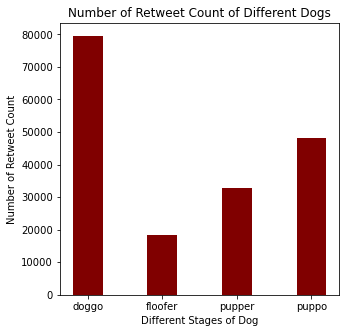

<Figure size 432x288 with 0 Axes>

In [59]:
fig = plt.figure(figsize = (5, 5))
plt.bar(twitter_archive.dog_stage, twitter_archive.retweet_count, color = 'maroon', width = 0.4)
plt.xlabel('Different Stages of Dog')
plt.ylabel('Number of Retweet Count')
plt.title('Number of Retweet Count of Different Dogs')
plt.show()
plt.savefig('Retweet_count')

from the above chat, doggo stage has the highest retweet

In [60]:
#Which stage of dog has the highest favorite count
twitter_archive[twitter_archive.favorite_count == twitter_archive.favorite_count.max()]

,dog_stage,retweet_count,favorite_count,month
2046,puppo,48265,132810,January


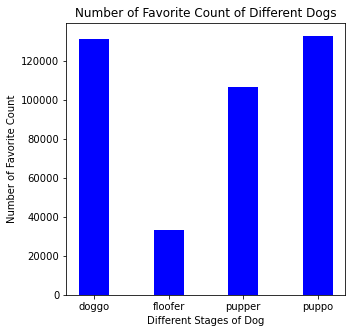

<Figure size 432x288 with 0 Axes>

In [61]:
fig = plt.figure(figsize = (5, 5))
plt.bar(twitter_archive.dog_stage, twitter_archive.favorite_count, color = 'blue', width = 0.4)
plt.xlabel('Different Stages of Dog')
plt.ylabel('Number of Favorite Count')
plt.title('Number of Favorite Count of Different Dogs')
plt.show()
plt.savefig('Favorite_Count')

The chart shows that puppo and doggo have the highest favorite count

In [62]:
#which dog stage has both highest retweet count and favorite count
top_ten = twitter_archive.sort_values(by = ['retweet_count','favorite_count'], ascending = False)
top_ten.head(10)

,dog_stage,retweet_count,favorite_count,month
1775,doggo,79515,131075,June
1787,doggo,52360,75163,June
2046,puppo,48265,132810,January
1780,doggo,42228,95450,January
1918,pupper,32883,106827,May
1791,doggo,27728,55683,November
1889,pupper,24514,38551,January
1779,doggo,21794,49960,January
2060,puppo,19669,56413,January
2041,puppo,19196,47844,April


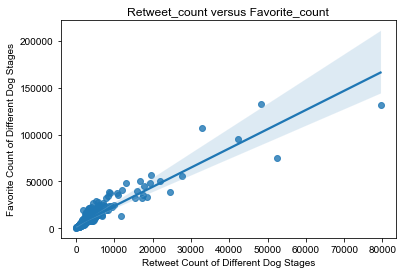

In [63]:
#what is the relationship between favorite count and retweet count
x = sb.regplot(x = twitter_archive.retweet_count, y = twitter_archive.favorite_count)
x.set_title('Retweet_count versus Favorite_count')
x.set_xlabel('Retweet Count of Different Dog Stages')
x.set_ylabel('Favorite Count of Different Dog Stages')
#plt.savefig('Retweet and Favorite count')
sb.set_style('darkgrid')
plt.savefig('Retweet_and_Favorite_count')

There is a strong correlation between number of retweet and number of favorite count which suggest that users are likely to retweet dogs that they like.

# Conclusion.

1. Doggo is the stage of dog with the highest retweet count.
2. Puppo is the stage of dog with the highest favorite count.
3. There is a strong correlation between number retweet and number of favorite which suggest that users are likely to retweet dogs that they like.
4. The display also show that January and June have the highest number of retweet count and favorite count. Which suggest:
        a. Beginning of the year where users show off their dogs maybe for new year rating.
        b. Middle of the year where users show off the progress (growth) of their dogs for better rating.
